<a href="https://colab.research.google.com/github/Narichie/Covid_19_Mortality/blob/main/Covid_19_Death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing COVID-19 Mortality Trends and Conditions in the Midwest.

----------------------
 ## **Introduction**
 ----------------------
The Midwest region encountered significant challenges during the COVID-19 pandemic, with varying impacts across states and demographics. This study analyzes mortality trends, demographic patterns, and underlying health conditions related to COVID-19 deaths to uncover factors influencing fatality rates. By examining total deaths by state, age group distribution, and health condition relationships, the analysis aims to identify high-risk groups and trends that affected COVID-19 outcomes in the Midwest.

----------------------
## **Objective**
----------------------
The main objectives of the project are:

•	Visualize total COVID-19 deaths across Midwest states to identify regional disparities.

•	Explore demographic patterns by analyzing the distribution of deaths by age group using boxplots.

•	Investigate the impact of conditions by creating bar plots to rank conditions contributing to mortality.

•	Generate actionable recommendations for public health policies and interventions based on findings.

•Perform correlation analysis to assess relationships between COVID-19 deaths and other numeric metrics, such as the number of mentions

----------------------
#### **Research question**
----------------------
•	What are the trends, demographic distributions, and condition-specific factors influencing COVID-19 deaths across Midwest states?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

# Helps on better visalization of graphs
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
# Load datasets
covid_death = pd.read_csv('Conditional_Covid_19_Death_by _state__age_sex.csv')

In [ ]:
covid_death.head()

,Data As Of,Start Date,End Date,Group,Year,Month,Sex,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,48.0,48.0
1,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,162.0,165.0
2,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,402.0,404.0
3,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,1054.0,1064.0
4,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,2501.0,2536.0


In [ ]:
# checking shape of the data

print("There are", covid_death.shape[0], 'rows and', covid_death.shape[1], "columns.")

There are 138000 rows and 14 columns.


In [ ]:
# Drop unnecessary columns for clarity
covid_death = covid_death.drop(['ICD10_codes'], axis=1)

In [ ]:
covid_death.head()

,Data As Of,Start Date,End Date,Group,Year,Month,Sex,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,0-24,48.0,48.0
1,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,25-34,162.0,165.0
2,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,35-44,402.0,404.0
3,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,45-54,1054.0,1064.0
4,9/24/23,1/1/20,9/23/23,By Total,NaN,NaN,All Sexes,Illinois,Respiratory diseases,Influenza and pneumonia,55-64,2501.0,2536.0


In [ ]:
covid_death['Start Date'] = pd.to_datetime(covid_death['Start Date'])

### Summary Statistics

Calculating total, mean, median, and standard deviation of COVID-19 Deaths by categories like State, Age Group, or Condition.

In [ ]:
# Total deaths by state
state_deaths = covid_death.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False)

# Total deaths by condition
condition_deaths = covid_death.groupby('Condition')['COVID-19 Deaths'].sum().sort_values(ascending=False)

# Summary statistics for COVID-19 deaths
summary_stats = covid_death['COVID-19 Deaths'].describe()

print("Total Deaths by State:\n", state_deaths)
print("\nTotal Deaths by Condition:\n", condition_deaths)
print("\nSummary Statistics:\n", summary_stats)

Total Deaths by State:
 State
Ohio            1090446.0
Illinois         857240.0
Michigan         766221.0
Indiana          630686.0
Missouri         477690.0
Wisconsin        402985.0
Minnesota        383921.0
Iowa             238231.0
Kansas           214046.0
Nebraska         134276.0
South Dakota      81556.0
North Dakota      65317.0
Name: COVID-19 Deaths, dtype: float64

Total Deaths by Condition:
 Condition
COVID-19                                                                     1444665.0
All other conditions and causes (residual)                                    624328.0
Influenza and pneumonia                                                       619016.0
Respiratory failure                                                           513265.0
Hypertensive diseases                                                         271468.0
Diabetes                                                                      203351.0
Ischemic heart disease                                     

### Visualizing Total COVID-19 Deaths by State
Highlighting which states experienced the highest number of COVID-19 deaths.

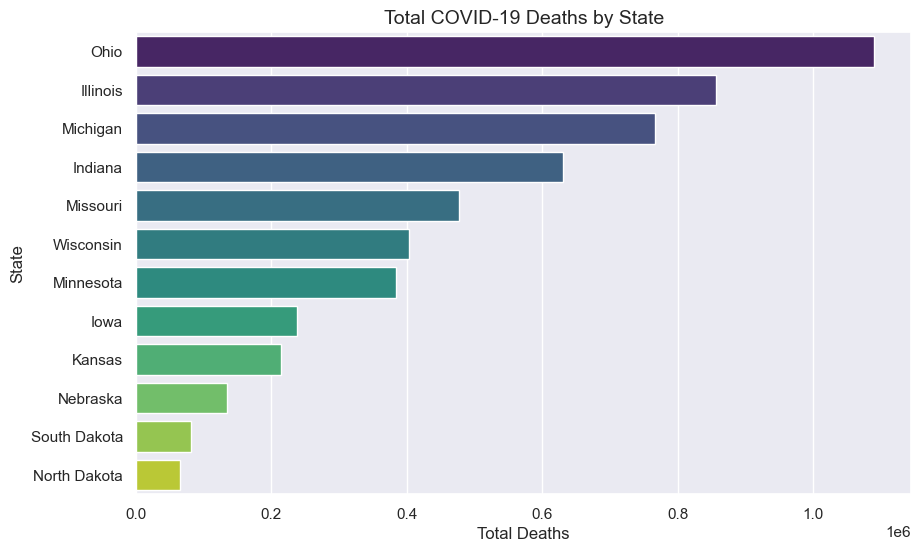

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_deaths.values, y=state_deaths.index, palette='viridis')
plt.title('Total COVID-19 Deaths by State', fontsize=14)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

#### Distribution of Deaths by Age Group
Analyze the spread of deaths across age groups to understand risk levels.

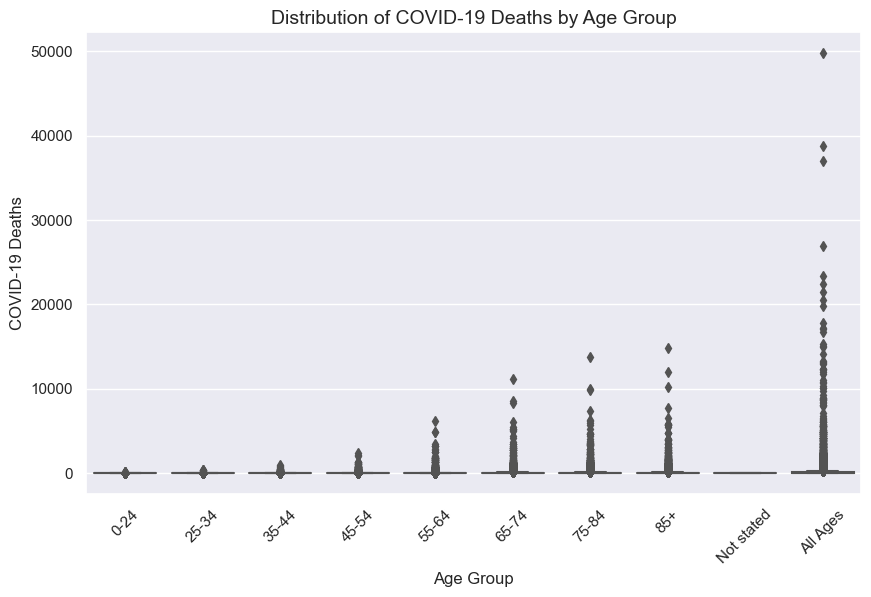

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='COVID-19 Deaths', data=covid_death, palette='coolwarm')
plt.title('Distribution of COVID-19 Deaths by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('COVID-19 Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### COVID-19 Deaths Over Time
Showing the trend of deaths over the period covered in the dataset (Start Date to End Date)

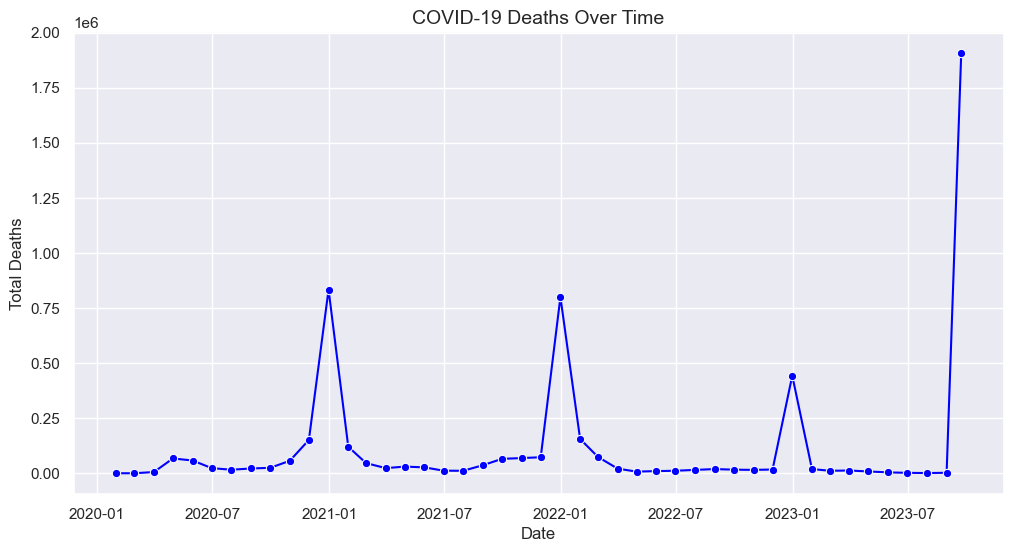

In [ ]:
# Convert `Start Date` and `End Date` to datetime
covid_death['Start Date'] = pd.to_datetime(covid_death['Start Date'])
covid_death['End Date'] = pd.to_datetime(covid_death['End Date'])

# Group by time for trends
time_trends = covid_death.groupby('End Date')['COVID-19 Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='End Date', y='COVID-19 Deaths', data=time_trends, marker='o', color='blue')
plt.title('COVID-19 Deaths Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.grid(True)
plt.show()

#### Deaths by Condition
Highlighting which underlying conditions had the most significant impact on COVID-19 deaths

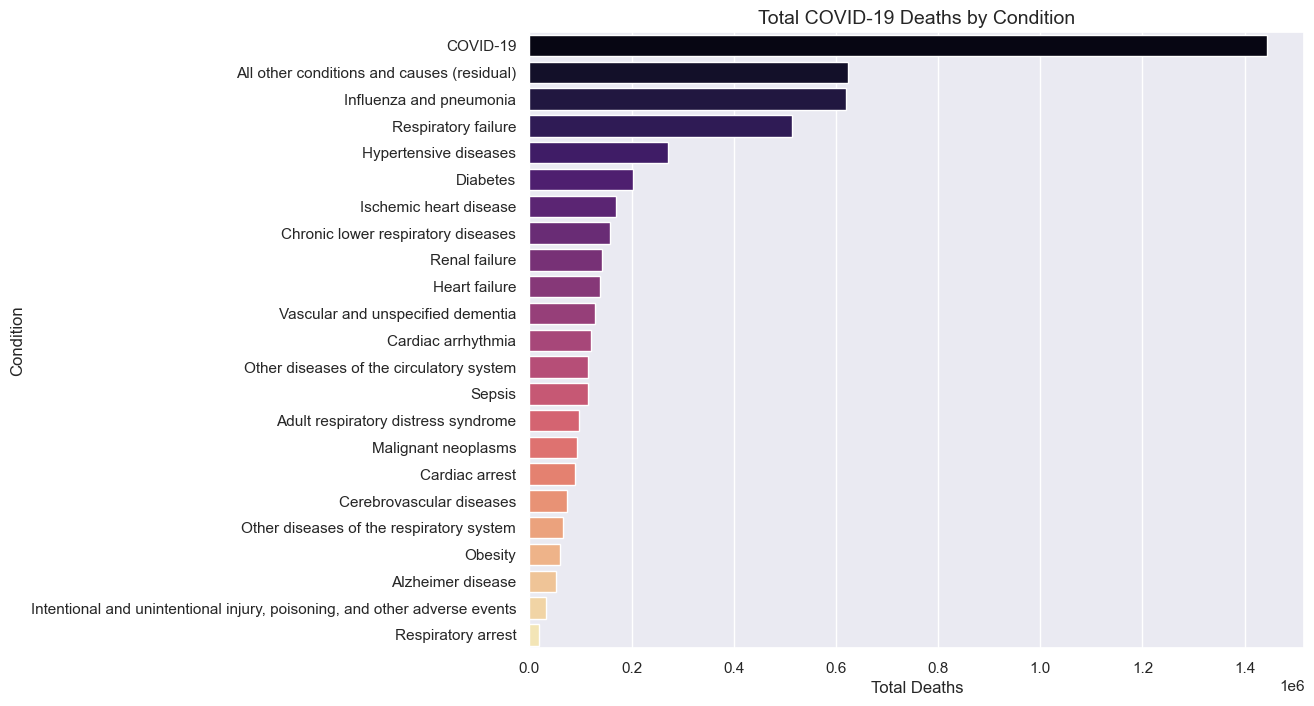

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=condition_deaths.values, y=condition_deaths.index, palette='magma')
plt.title('Total COVID-19 Deaths by Condition', fontsize=14)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('Condition', fontsize=12)
plt.show()

#### Correlation Analysis
Assess correlations between numeric columns like COVID-19 Deaths and Number of Mentions.

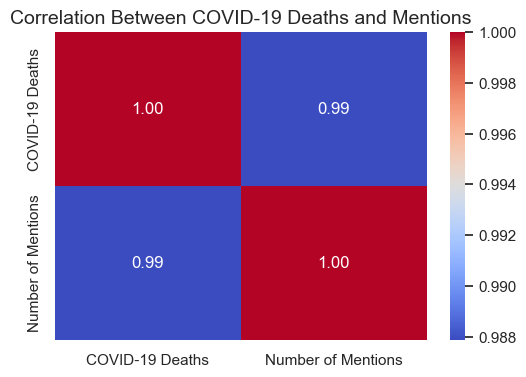

In [ ]:
# Compute correlation matrix
correlation_matrix = covid_death[['COVID-19 Deaths', 'Number of Mentions']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between COVID-19 Deaths and Mentions', fontsize=14)
plt.show()

#### Insights from Specific Conditions
• Identify the age group and condition with the highest number of deaths.

• Rank conditions by impact on specific states or demographics.


In [ ]:
# Top condition by total deaths
top_condition = covid_death.groupby('Condition')['COVID-19 Deaths'].sum().idxmax()
top_condition_deaths = covid_death[covid_death['Condition'] == top_condition]

# Analyze for a specific state
state_condition_data = covid_death[covid_death['State'] == 'Illinois'].groupby('Condition')['COVID-19 Deaths'].sum().sort_values(ascending=False)

print(f"Top Condition: {top_condition}")
print("\nDeaths in Illinois by Condition:\n", state_condition_data)

Top Condition: COVID-19

Deaths in Illinois by Condition:
 Condition
COVID-19                                                                     231926.0
Influenza and pneumonia                                                      106654.0
All other conditions and causes (residual)                                    79469.0
Hypertensive diseases                                                         78414.0
Respiratory failure                                                           73349.0
Diabetes                                                                      49236.0
Ischemic heart disease                                                        28569.0
Chronic lower respiratory diseases                                            28461.0
Heart failure                                                                 24756.0
Vascular and unspecified dementia                                             19194.0
Cardiac arrhythmia                                                     